Student number: 16365576
Name: David Mannion

## Task 1: Identify a suitable web API

In [1]:
import http.client
import json
import numpy as np
import pandas as pd


I found this API on Github, from Todd Motto's collection at https://github.com/toddmotto/public-apis
It was under the 'Sports and Fitness' Heading

It provides data on football teams, players and matches from the past from multiple leagues.

It is an open API and does not have to be paid for, however it does employ throttling if too many requests are 
sent in a certain time period.

In [2]:
leagues = {'germany':'BL1' ,'england':'PL' , 'italy':'SA',
           'spain': 'PD' , 'france':'FL1' ,'portugal': 'PPL'}

choice = 'germany'
year = 2019

query = '/v2/competitions/' + leagues[choice] + '/matches?season=' + str(year)
connection = http.client.HTTPConnection('api.football-data.org')
headers = { 'X-Auth-Token':'0915a628a80d47eba3e17619448e040b'}
connection.request('GET', query, None, headers )
response = json.loads(connection.getresponse().read().decode())



This sets up a connection request with the API. 
It returns data on every Bundesliga (German Football First Division) match from the 2019/2020 season.

The connection.request() requests information from the API client, 'api.football-data.org'

The connection.request returns a JSON file via the code 'connection.getresponse().read().decode()'

The json.loads() function converts this into a Python readable format, in the form
of nested python lists and dictionaries.

Note: For the first half of this assignment, my analyses and commentary will be based on 
the 2019 German Bundesliga.

You can, however, chance the choice and year variables in the above cell to view data and plots 
for various different years and leagues(from the leages dictionary)

In [3]:
response['count'] # total number of matches
league = response['competition']['name'] # confirming we have the right league(Bundesliga!)
comp_id = response['competition']['id']
print('League: ',league , ', id:',comp_id)

League:  Bundesliga , id: 2002


Printing out the name of the league and its unique league identifier


In [4]:
def get_matches(country,year):
    
    query = '/v2/competitions/' + leagues[country] + '/matches?season=' + str(year)
    connection = http.client.HTTPConnection('api.football-data.org')
    headers = { 'X-Auth-Token':'0915a628a80d47eba3e17619448e040b'}
    connection.request('GET', query, None, headers )
    response = json.loads(connection.getresponse().read().decode())

    df = pd.DataFrame(response['matches'])
    matches = pd.DataFrame()

    win = [] # stores 'winner values'
    hm  = [] # stores home team score
    aw = [] # store away team score
    hn = [] # stores home team names
    an = [] # stores away team names
    dt = [] # stores the date
    tim = [] # stores the time
    
    for i in range(len(df['score'])):
        win.append(df['score'][i]['winner'])
        hm.append(df['score'][i]['fullTime']['homeTeam'])
        aw.append(df['score'][i]['fullTime']['awayTeam'])
        hn.append(df['homeTeam'][i]['name'])
        an.append(df['awayTeam'][i]['name'])
        dt.append(df['utcDate'][i][0:10])
        tim.append(df['utcDate'][i][-9:-7])

    #matches['id'] = df['id']
    matches['Date'] = dt
    matches['Time'] = tim
    matches['Matchday'] = df['matchday']
    matches['HomeTeam'] = hn
    matches['AwayTeam'] = an
    matches['HomeScore'] = hm
    matches['AwayScore'] = aw
    matches['Winner'] = win
    
    matches.dropna(axis = 0 , inplace = True) #dropping matches that fall outside the regular season, i.e. the relegation playoff
    
    return matches



The function get_matches(country,year) gets data on every match in a countrys first division from a given year. 

First, it sets up a connection with the api. Then it parses the data into python readable data in the same way as described previously.

It stores the retrieved data in a dataframe called matches.

Data descriptions: 

Date: What date the match was played on, format: YYYY-mm-dd. dytpe = 'str'

Time: What time was the match started at, in 24 hour format, rounded down to the nearest hour. e.g 18 = 18:00 = 6pm(local time). dtype = 'str'

Matchday: What matchday it is in the season, e.g. for the 3rd matchday = 3, dtype - 'int'

HomeTeam: Name of the home team. dtype = 'str'

AwayTeam: Name of the away team. dtype = 'str'

HomeScore: Total goals scored by the home team at the end of the match, dytpe = 'int'

AwayScore: Total goals scored by the away team at the end of the match, dytpe = 'int'

Winner: Who won the match(who scored the most goals) - one of HOME_TEAM, AWAY_TEAM or DRAW

In [5]:
matches = get_matches('germany',2019)
matches.head(10)

,Date,Time,Matchday,HomeTeam,AwayTeam,HomeScore,AwayScore,Winner
0,2019-08-16,18,1.0,FC Bayern München,Hertha BSC,2,2,DRAW
1,2019-08-17,13,1.0,BV Borussia 09 Dortmund,FC Augsburg,5,1,HOME_TEAM
2,2019-08-17,13,1.0,SV Werder Bremen,TSV Fortuna 95 Düsseldorf,1,3,AWAY_TEAM
3,2019-08-17,13,1.0,Bayer 04 Leverkusen,SC Paderborn 07,3,2,HOME_TEAM
4,2019-08-17,13,1.0,SC Freiburg,1. FSV Mainz 05,3,0,HOME_TEAM
5,2019-08-17,13,1.0,VfL Wolfsburg,1. FC Köln,2,1,HOME_TEAM
6,2019-08-17,16,1.0,Borussia Mönchengladbach,FC Schalke 04,0,0,DRAW
7,2019-08-18,13,1.0,Eintracht Frankfurt,TSG 1899 Hoffenheim,1,0,HOME_TEAM
8,2019-08-18,16,1.0,1. FC Union Berlin,RB Leipzig,0,4,AWAY_TEAM
9,2019-08-23,18,2.0,1. FC Köln,BV Borussia 09 Dortmund,1,3,AWAY_TEAM


Getting an idea of what the data we have now looks like

In [6]:
matches.to_csv(league + '_Matches_' +str(year)+'.csv')

Writing the match data to a csv

In [7]:
print(matches['HomeTeam'].value_counts().value_counts()) 
print(matches['AwayTeam'].value_counts().value_counts()) 

17    18
Name: HomeTeam, dtype: int64
17    18
Name: AwayTeam, dtype: int64


The result shows above that all 18 teams played 17 home games as well as 17 away games. 
which is correct as you don't play yourself ( ie 18 - 1 = 17) home and away games per season 

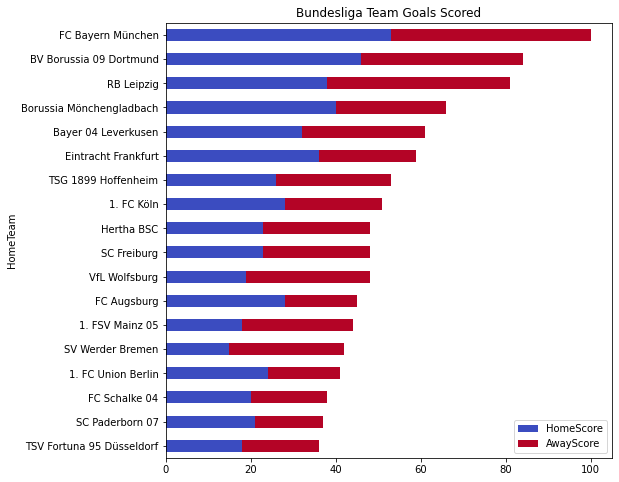

In [8]:

home = matches.groupby('HomeTeam')[['HomeScore', 'AwayScore']]
away = matches.groupby('AwayTeam')[['HomeScore', 'AwayScore']]
home = home.sum()
away = away.sum()

summed = pd.DataFrame()
summed['HomeScore'] = home['HomeScore']
summed['AwayScore'] = away['AwayScore']
summed['Total'] = summed['HomeScore'] + summed['AwayScore']

summed.sort_values(by = 'Total', ascending = True , inplace = True)

from matplotlib import cm
import matplotlib.pyplot as plt
cmap = cm.get_cmap('coolwarm') # Colour map (there are many others)
summed[['HomeScore', 'AwayScore']].plot(kind ='barh' ,figsize = (8,8),
            title = league + ' Team Goals Scored' ,  colormap = cmap,stacked = True)
plt.show()

From this we can see Bayern Munich scored the most goals, followed by Dortmund.

Both Bayern and dortmund are consistent both home and away, with their goal tallies split
pretty evenly between both.

In [9]:

points = pd.DataFrame(columns = summed.index.values)
points.loc[0,:] = 0

for match in matches.values:
    
    if match[-1] == 'HOME_TEAM':
        points.loc[match[2],match[3]] = 3
        points.loc[match[2],match[4]] = 0
    elif match[-1] == 'AWAY_TEAM':
        points.loc[match[2],match[3]] = 0
        points.loc[match[2],match[4]] = 3
    else:
        points.loc[match[2],match[3]] = 1
        points.loc[match[2],match[4]] = 1

standings = points.cumsum(axis = 0)

final_table = pd.DataFrame(standings.max().sort_values(ascending = False))
final_table.columns = ['Final Points']
final_table

,Final Points
FC Bayern München,82.0
BV Borussia 09 Dortmund,69.0
RB Leipzig,66.0
Borussia Mönchengladbach,65.0
Bayer 04 Leverkusen,63.0
TSG 1899 Hoffenheim,52.0
VfL Wolfsburg,49.0
SC Freiburg,48.0
Eintracht Frankfurt,45.0
Hertha BSC,41.0


This code calculated the final points total for each team.
3 points for a win, 1 for a Draw, 0 for a loss

We can see that Bayern Munich won the Bundesliga with a total of 82 points.
It appears  it was a very comfortable season for them, beating second place Dortmund by 13 points.

However, if we look at the halfway point of the season, with 10 games played the table shows a different story:

In [10]:
no_games = 10
halfway = pd.DataFrame(standings.iloc[no_games,:].sort_values(ascending = False))
halfway.columns = ['Points up to Matchday ' +str(no_games)]
halfway

,Points up to Matchday 10
Borussia Mönchengladbach,22
BV Borussia 09 Dortmund,19
FC Bayern München,18
FC Schalke 04,18
SC Freiburg,18
RB Leipzig,18
Eintracht Frankfurt,17
TSG 1899 Hoffenheim,17
VfL Wolfsburg,17
Bayer 04 Leverkusen,15


We see Bayern in 3rd place after 10 games.

A surpising situation given Bayern's history of dominating the German League.

Bayern did end up winning the league in the end, but lets take a look at what was the turning point
in their season.


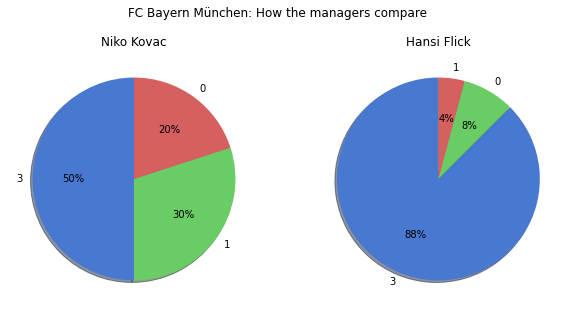

In [11]:
%matplotlib inline
champions = final_table.index[0]

first_half = points[champions][:no_games].value_counts()
second_half = points[champions][no_games +1:].value_counts()

r = 1

import matplotlib.style
import matplotlib as mpl
import seaborn as sns

mpl.style.use('seaborn-muted')

fig , (ax1,ax2)  = plt.subplots(1,2 , figsize = (10,5))

ax1.pie(first_half,
        labels = first_half.index, 
        autopct = '%1.0f%%' ,
        shadow = True ,
        startangle = 90 )

ax1.set_title('Niko Kovac')

ax2.pie(second_half,
        labels = second_half.index, 
        autopct = '%1.0f%%' ,
        shadow = True , 
        startangle = 90 )

ax2.set_title('Hansi Flick')
fig.suptitle(champions+': How the managers compare')
plt.show()

The piecharts tell an interesting story: Bayern only got 3 points(i.e. a win) in half of their games 
before Flick was appointed. 

With Flick in charge, Bayern won 88% of thier games and lost only 8% of the time.

It appears the appointment of new manager Flick was the catalyst for change at Bayern.

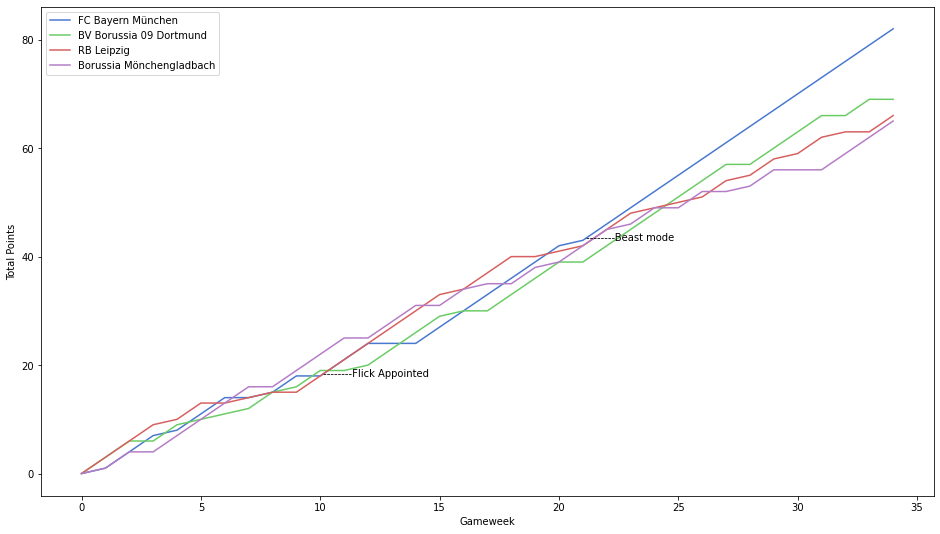

In [12]:
%matplotlib inline
top_four = final_table.index[0:4]
standings[top_four].plot(figsize = (16,9))
plt.xlabel('Gameweek')
plt.ylabel('Total Points')
plt.annotate(' --------Flick Appointed',(no_games,18))
plt.annotate(' --------Beast mode',(21,43))
plt.show()

The plot shows the progression of total points for the eventual top four teams.

The plot shows that at the start of the season, Bayern were tit for tat with the other teams.

The blue line in the plot above shows Bayern took the lead in matchday 20 and never relinquished it.
From matchday 21 onwards, Bayern won all their games.



https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html

In [13]:
connection2 = http.client.HTTPConnection('api.football-data.org')
headers = { 'X-Auth-Token':'0915a628a80d47eba3e17619448e040b'}

query = '/v2/competitions/' + str(comp_id) + '/teams?season='+str(year)

connection2.request('GET', query, None, headers )
response = json.loads(connection2.getresponse().read().decode())


Collecting data on team names and ids to be used for collecting player data

In [14]:
team_names = []
team_ids = []

for team in response['teams']:
    team_names.append(team['name'])
    team_ids.append(team['id'])
 

Adding the data from the api into lists to be used later on

A common opinion in football circles is that you need a balance of youth and experience
to be successful.

Lets how a look at some data to see if the 2019 Bundesliga supports this theory.



In [15]:
from time import sleep
split = [4,8,12,16]
player_dobs = pd.DataFrame()
count = 0
sleep(30)
for i_d in team_ids:
    
        connection3 = http.client.HTTPConnection('api.football-data.org')
        headers = { 'X-Auth-Token':'0915a628a80d47eba3e17619448e040b'}

        query = '/v2/teams/' + str(i_d)
        connection3.request('GET', query, None, headers )
        response = json.loads(connection3.getresponse().read().decode())

        squad = response['squad']

        dobs = []
        for player in squad:
            dobs.append(player['dateOfBirth'][:10])
            
        player_dobs[i_d] = pd.Series(dobs[:len(dobs)-2])
    
        count += 1
        
        if count in split:
            sleep(30) # The API has a throtler which only allows a certain number of requests.
                      # Hence I added this 30 second delay after the 4th,8th,12th,16th requests.

player_dobs.columns = team_names
player_dobs.dropna(inplace = True)

Here I am getting the date of birth for each player in the Bundesliga.

In [16]:

#player_dobs.to_csv('dobs.csv',index = False)
bd = pd.read_csv('dobs.csv')



Saving this data to a csv for safe keeping, then loading it with pandas.

Note I have commented out the writing of the data - This is because the code takes a long time to run(due to the API throttler)
Instead, if you want to use the data, it is already in the zip file provided, as dobs.csv

In [17]:
bd_conv = pd.DataFrame(index = range(len(team_names)) , columns = range(len(team_ids)))

for row in range(bd.shape[0]):
    for col in range(bd.shape[1]):
        bd_conv.at[row,col]  = pd.to_datetime(bd.iloc[row,col],format = '%Y-%m-%d' , errors = 'ignore')

ages = pd.DataFrame(index = range(len(team_names)) , columns = range(len(team_ids)))
for row in range(bd.shape[0]):
    for col in range(bd.shape[1]):
        ages.at[row,col] = (pd.to_datetime('now') - bd_conv.iloc[row,col]).to_timedelta64()/np.timedelta64(365,'D')
        
ages.columns = team_names
ages.to_csv('player_ages.csv',index = False)


Converting players date of birth in string format to time format.
Then finding out how old they are, by subtracting this from todays date.
This returns a timedelta object (in days) so I divided by 365 to find each players age in years.

I then saved this data to the csv called 'player_ages.csv'

In [18]:
ages = pd.read_csv('player_ages.csv')

summary = ages.agg(['mean','std','min', 'max', 'median']).round(decimals = 1)
summary[top_four].sort_values(by = 'mean',axis = 1)

,RB Leipzig,BV Borussia 09 Dortmund,FC Bayern München,Borussia Mönchengladbach
mean,24.1,26.0,26.3,26.6
std,4.2,5.1,4.5,4.9
min,18.3,17.4,17.7,18.9
max,35.1,35.5,34.7,35.1
median,23.3,26.1,25.6,26.2


Bayern's average age is in between that of their main rivals, 
showing they have a better balance of youth and experience.

Their youngest player at only 17 and oldest at 34 shows a wide range of ages in the team,
again demonstrating the mix of youth and experience.

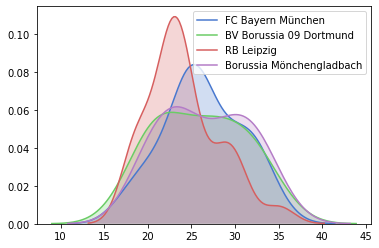

In [19]:
for team in top_four:
    sns.kdeplot(ages[team],shade = True)

This plot gives a kernel density estimation of the ae profile of each team.

What is interesting to see is that Bayern and Leipzig both have peaked distributions while 
Dortmund and Monchengladbach have flat ones.

Bayerns Curve(Blue) is more symmetrical around the mean, which suggests a high amount of
players aged close to the mean(around 25).

This age is considered to be when players are at their peak, which gives Bayern the edge over their rivals.

This suggests that having players at thier peak of 25 is perhaps more important than having 
a mix of older and younger players.

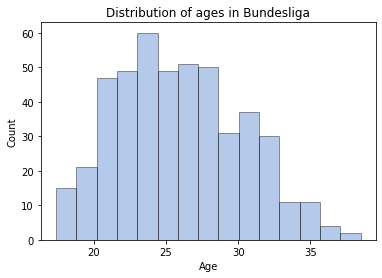

In [20]:
kwargs = dict( alpha = 0.4 , bins = 15, edgecolor = 'k' )
plt.hist(ages.values.flatten(), **kwargs)
plt.title('Distribution of ages in ' + league)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


This plot shows the distribution of age for all players in the Bundesliga.
We can see this data is skewed to the right(positively skewed). 
The mean is around 26.

In [21]:
from scipy import stats
print(stats.describe(ages.values.flatten()))

DescribeResult(nobs=468, minmax=(17.390810807032853, 38.46752313164596), mean=25.946202440253632, variance=18.554990045347903, skewness=0.32578495925644035, kurtosis=-0.5263554319736943)


Generating some summary statistics for the  overall age profile of bundesliga players.

## Investigation into how weather effects number of goal scored.

There are many factors that influnce the amount of goals scored in a football game.
Team form and the quality of the two teams playing are usually the two main variables looked into.

Weather is one that is quite often overlooked. It is seen as unimportant and is said to have negligible effect 
on the outcome. 

I will conduct an investigation to check if this is the case.

This time, I will investigate data from The English Premier League.

In [22]:

#This code cretes a dictionary of Teams and their corresponding order aplhabetically

connection5 = http.client.HTTPConnection('api.football-data.org')
headers = { 'X-Auth-Token':'0915a628a80d47eba3e17619448e040b'}

#query = '/v2/competitions/' + str(comp_id) + '/teams?season='+str(year)
query = '/v2/competitions/' + 'PL' + '/teams?season='+str(year)


connection5.request('GET', query, None, headers )
response = json.loads(connection5.getresponse().read().decode())

no_teams = len(response['teams'])
team_names = {}

for i in range(no_teams):
    team_names[response['teams'][i]['name']] = i


#team_names

First, I get the team names, taken from the same football api as before.

I add them to a dictionary with their corresponing number, ranked alphabetically.
This is important as It will be used further on to get the address of the team.

In [23]:
def get_location(team):
    pc = response['teams'][team_names[team]]['address'][-8:].replace(" ","") # gets the UK Postal Code
    pc_as_list = list(pc)
    
    if pc_as_list[-3] == 'O':
        pc_as_list[-3] = 0
    
    if pc_as_list[0].islower():
        del(pc_as_list[0])
    
    pc = ''.join(map(str, pc_as_list))

    
    return pc



The get_location(team) function gets the postcode of the inputted team. 

Note that I replace an O with a 0 if it is the third last letter - this was a typo in the api data that had to be rectified. 

Also, as some post codes are longer than others,  some of the postcodes ended up with a letter that
was not part of their postcode. Since all letters in postcodes provided in the api are capitalized, I wrote code to remove the first letter if it was in lowercase.

In [24]:
import urllib.request

def get_weather_data(location,date,time):
    weather_api_key  = 'ff893befca2b424d92f150732201211'

    link = "http://api.worldweatheronline.com/premium/v1/past-weather.ashx?key="+ weather_api_key + "&q="+ location +"&format=json&date="+ date +"&tp=1"

    response = json.loads(urllib.request.urlopen(link).read().decode())
    
    return response['data']['weather'][0]['hourly'][time]


weather_store = get_weather_data('Dublin',"2020-11-13",15)
#weather_store

The get_weather_data() function returns various weather metrics for a given location , date and time(to the nearest hour)

It takes it from the worldweatheronline api. Thankfully they provide a 60 day free trial.

In [25]:
matches = get_matches('england', 2019)

Getting information on every premier league game in the 2019 season, storing it in matches

In [26]:
matches['TotalGoals'] = matches['HomeScore'] + matches['AwayScore']
matches['PostCode'] = matches['HomeTeam'].apply(lambda x: get_location(x))
m = matches[['Date','Time','Matchday','PostCode','TotalGoals']]
m.head(6)

,Date,Time,Matchday,PostCode,TotalGoals
0,2019-08-09,19,1,L40TH,5
1,2019-08-10,11,1,E139AZ,5
2,2019-08-10,14,1,BB104BX,3
3,2019-08-10,14,1,SE256PU,0
4,2019-08-10,14,1,WD180ER,3
5,2019-08-10,14,1,BH77AF,2


Adding home and away goals to get a total goals figure

Taking out the relevant data from the matches data and adding in the postcodes to be fed into the location input of the
get_weather_data function.



In [27]:

num_games = len(m['Date'])

names = ['tempC','windspeedKmph','uvIndex','precipMM','humidity','pressure']
vals = np.empty((num_games,len(names)), dtype = object)

for game_no in range(num_games):
    weather = pd.DataFrame(get_weather_data(m.loc[game_no,'PostCode'] ,m.loc[game_no,'Date'], int(m.loc[game_no,'Time'])))
    vals[game_no,:] = weather[names].values



Getting weather data for each game in matches, based on date, time and postcode.

In [28]:
weather_data = pd.DataFrame(vals, columns = names)
weather_data.to_csv('weather_data.csv',index = False)


saving this data to a csv

In [29]:
weather_data.head()

,tempC,windspeedKmph,uvIndex,precipMM,humidity,pressure
0,19,25,1,0.5,77,992
1,20,38,5,0.0,57,1005
2,16,30,4,0.8,92,995
3,21,40,5,0.0,57,1007
4,20,43,5,0.2,64,1005


tempC - temperature in degrees at the start of the match

windspeedKmph - wind speed in kilometers per hour

uvIndex - a measure of how strong the sun is

precipMM - amound of rainfall in millimeters

humidity - % 

pressure - in Pascals. Normal is 1012

In [30]:
w = pd.read_csv('weather_data.csv')
w['TotalGoals'] = m['TotalGoals']


Integrating the total goals figures with the weather data 

#### Modelling the data

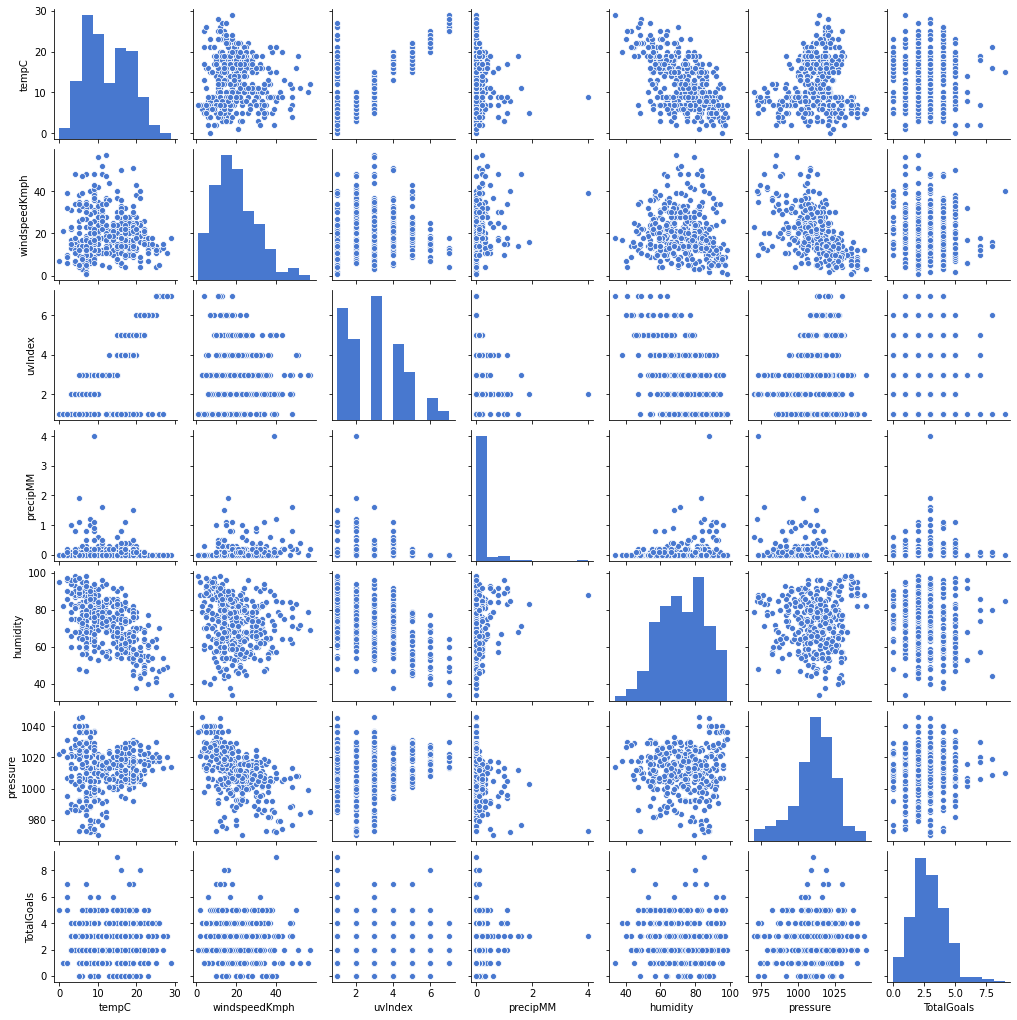

In [31]:
import seaborn as sns
sns.pairplot(w,height = 2)

Visualizing the data using correlation plots and histograms.

The main plots of interest are those along the bottem row, as they show the relationship between TotalGoals and 
the weather variables. 

Ideally, we would see some sort of relationship - for example as temperature increases so do the total number of goals.

Unfortunately there appears that there in no real relationships visible. 

We will continue and see if a Multivariate Linear Model can provide better insight into any possible relationships present 
in the data.

In [32]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

def power (data,power):
    return data**power

from sklearn.model_selection import train_test_split
w_train ,w_test = train_test_split(w, train_size = 0.75, random_state = 42)


f = 'TotalGoals ~ tempC  + windspeedKmph + uvIndex + precipMM + humidity + pressure'

m1 = smf.ols(formula = f, data = w_train )
res = m1.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             TotalGoals   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.270
Date:                Fri, 13 Nov 2020   Prob (F-statistic):              0.271
Time:                        15:32:22   Log-Likelihood:                -514.22
No. Observations:                 285   AIC:                             1042.
Df Residuals:                     278   BIC:                             1068.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.1626      8.110      0.267

An initial model using all the variables, along with a quadratic effect for temperature gives very poor results.

None of the predictors are considered statistically significant(at 5%) except humidity and the R squared( % of variance ecplained) is a very low 2.7%.

The pvalue for the model is 27% which suggests the model does not fit the data well at 5% significance level, as ideally the 
p value would be less than 5%.

In [33]:
f = 'TotalGoals ~  humidity + windspeedKmph +  + precipMM '

m1 = smf.ols(formula = f, data = w_train )
res = m1.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalGoals   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.035
Date:                Fri, 13 Nov 2020   Prob (F-statistic):              0.109
Time:                        15:32:22   Log-Likelihood:                -515.01
No. Observations:                 285   AIC:                             1038.
Df Residuals:                     281   BIC:                             1053.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.9558      0.573      6.902

After trying multiple combinations of predictor vairables, the combination of windspeedKmph , humidity and precipMM 
give the lowest p values.

What we can see from this model is that there is an average of 3.95 goals per game with when all variables are 0.



A negative coefficient for humidity means as humidity increases, the number of goals scored decreases.
Higher humidity leads to players tiering quicker, which is likely why less goals get scored.
It has the lowest p value of all the predictors and hence is the most significant of all the predictors.

The negative coefficient for wind speed suggests higher wind speed leads to a lower amount of goals scored. 

Some teams play a direct, long ball strategy which rely on kicking the ball far into their opponent's half.
A strong wind speed in a direction not towards their opponents goal would make it harder for this strategy to 
be effective.

While it is only significant at a 15% level, which is not very high, we can still see that an increase in rainfall(precipMM)
leads to more goals. This makes sense - players are more likely to slip and make errors, the ball also moves faster along a 
wet surfuce which suits a passing style of play a lot of teams use.



In [34]:

x_test = w_test[['windspeedKmph','precipMM','humidity']]
y_test = w_test['TotalGoals']

yhat = res.predict(x_test)

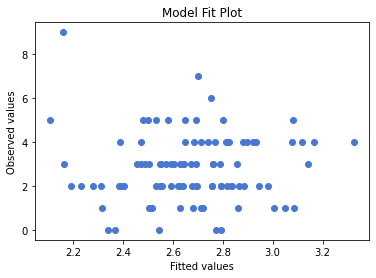

In [35]:
from statsmodels.graphics.api import abline_plot
y_train = w_train['TotalGoals']


fig, ax = plt.subplots()
ax.scatter(yhat, y_test)


ax.set_title('Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values')
plt.show()

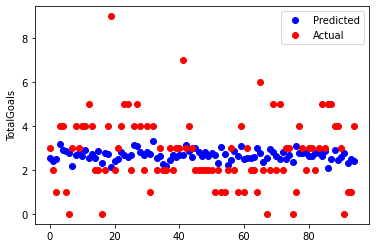

In [36]:

#plt.figure()
plt.plot(yhat.values, 'bo', label = 'Predicted')
#plt.figure()
plt.plot(y_test.values, 'ro', label = 'Actual')
plt.ylabel('TotalGoals')
plt.legend()
plt.show()

We can see from the plots that this model does not do a good job in 
predicting how many goals will be scored.

It nearly always predicts a score between 2 and 3 goals which is not very useful in predicting scores.

### Conclusion

Weather on its own is not a useful predictor of how many goals will be scored in a game. 
As can be seen in the charts above, it predicts a value near to 3 for almost every game.

What the model did show is how different weather effects like rainfall,humidity and wind speed effect 
total goals scored, with less goals expected at higher humidity and windspeed levels.

Adding more variables such as team form, tactics and even individual players in the game and
how they interact with weather would be an interesting investigation that may improve the 
model.

So a word of advice, if you want to bet on a over/under goals market in the premier league, 
do a bit more research than looking out the window! 